# Chapter 6. 데이터 프레임의 다양한 응용

## 1. 함수 매핑
* 시리즈 또는 데이터 프레임의 개별 원소를 특정 함수에 일대일 대응 시키는 과정  
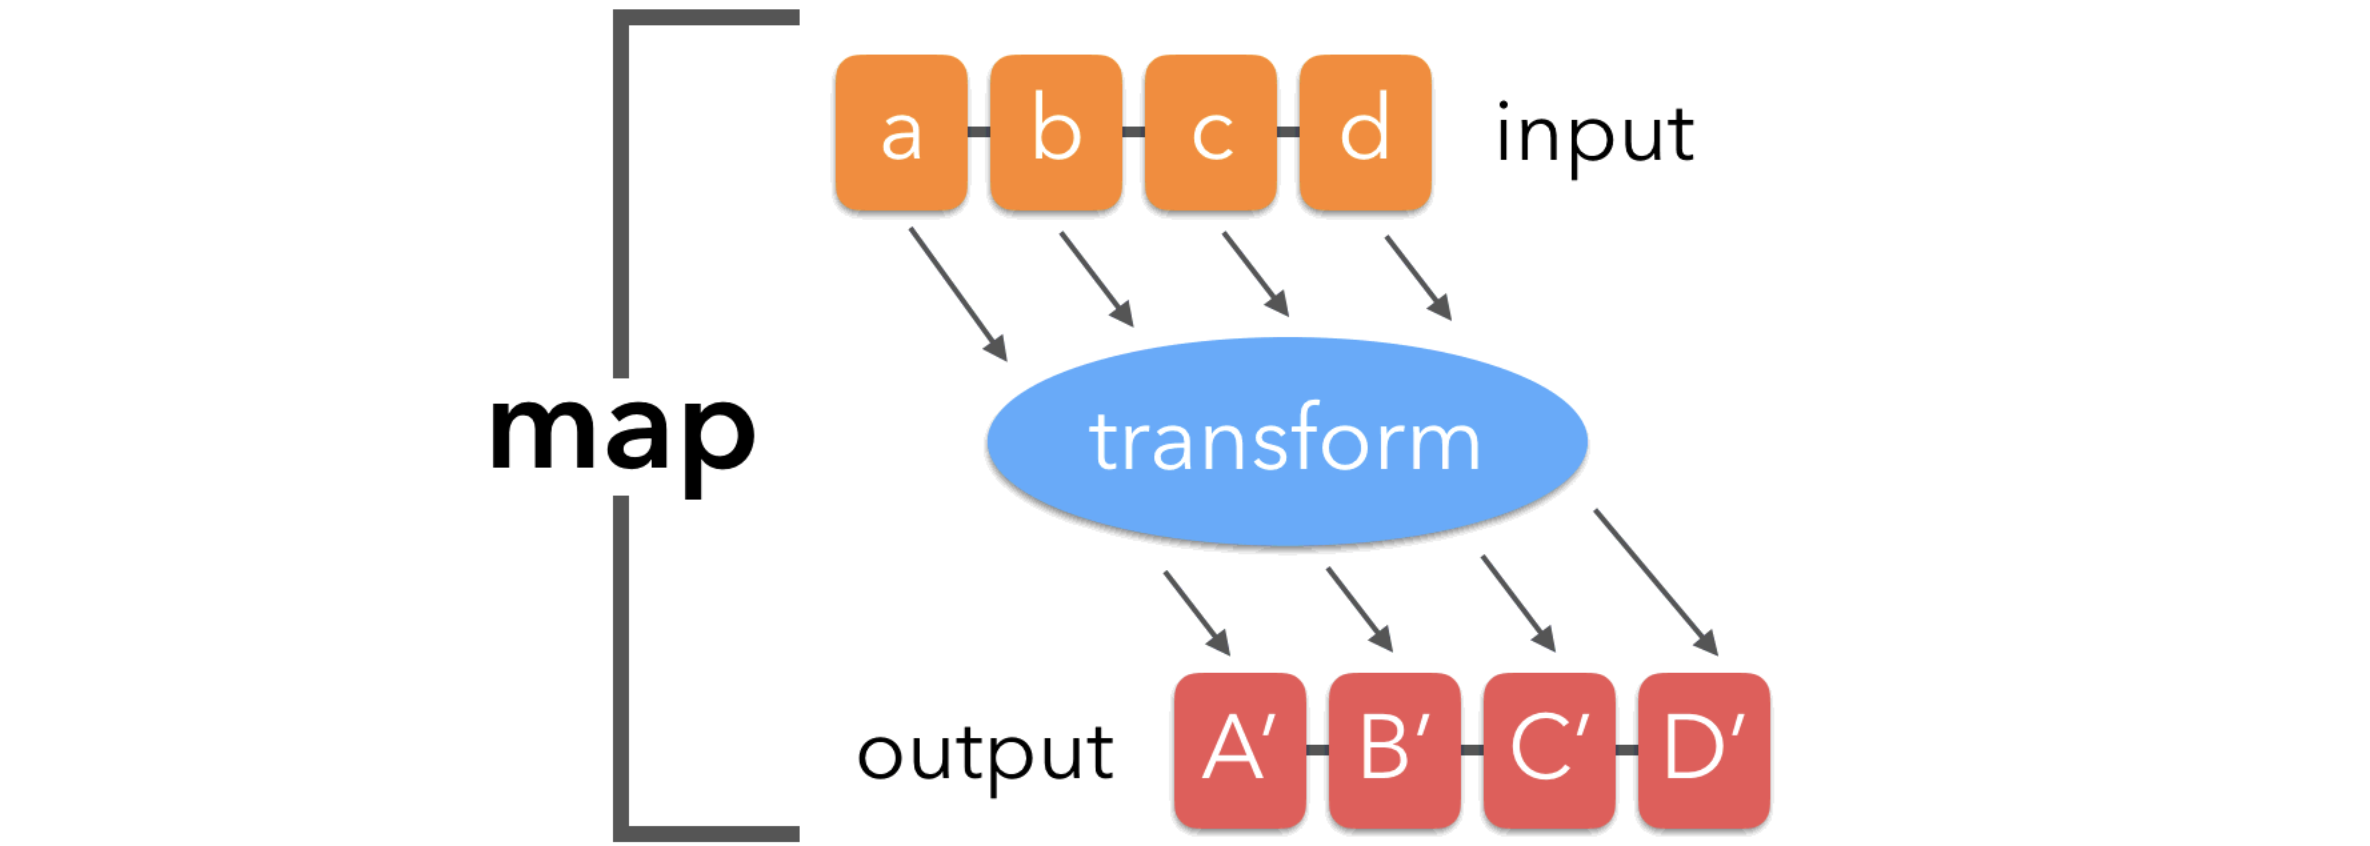

### !! 1-1. 개별 원소에 함수 매핑

#### 시리즈 원소에 함수 매핑
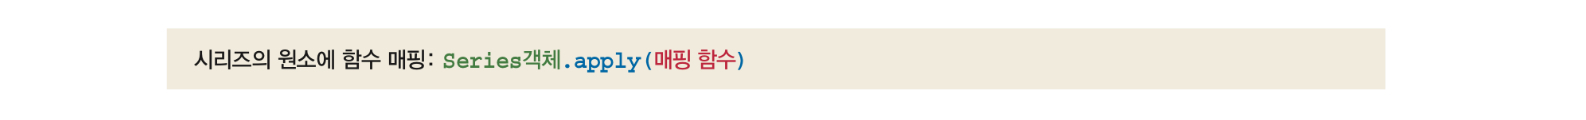

In [1]:
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10

df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [2]:
# 사용자 함수 정의
def add_10(n):
    return n + 10

def add_two_obj(a, b):
    return a + b

In [3]:
# 시리즈 객체에 적용
# n = df['age']의 모든 원소

sr1 = df['age'].apply(add_10)
sr1.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [4]:
# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
# a=df['age']의 모든 원소, b=10

sr2 = df['age'].apply(add_two_obj, b=10)
sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [5]:
# 람다 함수 활용: 시리즈 객체에 적용
# apply 함수 옵션: lambda x: x+10
# x=df['age']

sr3 = df['age'].apply(lambda x: x+10)
sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [6]:
sr4 = df['age'] + 10
sr4.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

#### 데이터프레임 원소에 함수 매핑
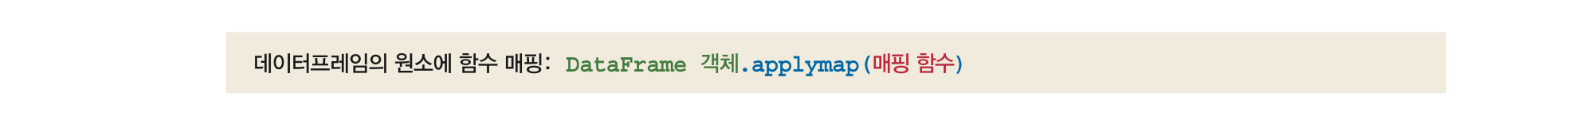

In [7]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [8]:
# 사용자 함수 정의
def add_10(n):
    return n + 10

In [9]:
# 데이터프레임에 applymap()으로 add_10() 함수를 매핑 적용

df_map = df.applymap(add_10)
df_map.head()

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500


### !! 1-2. 시리즈 객체에 함수 매핑

#### 데이터프레임의 각 열에 함수 매핑
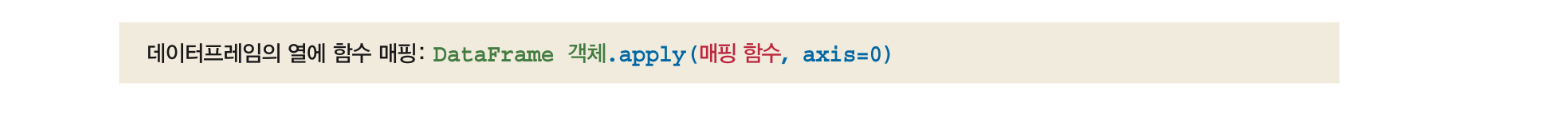

In [10]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

In [11]:
# 사용자 함수 정의
def missing_value(series):
    return series.isnull()

In [12]:
# 데이터프레임의 각 열을 인수로 전달하면 데이터프레임을 반환
# apply 함수, missing_value, axis=0

result = df.apply(missing_value, axis=0)
result.head()

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [13]:
# 사용자 함수 정의
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

In [14]:
# 데이터프레임의 각 열을 인수로 전달하면 시리즈를 반환

result = df.apply(min_max, axis=0)
result

age      79.5800
fare    512.3292
dtype: float64

In [15]:
df['age'].max() - df['age'].min()

79.58

#### 데이터프레임의 각 행에 함수 매핑
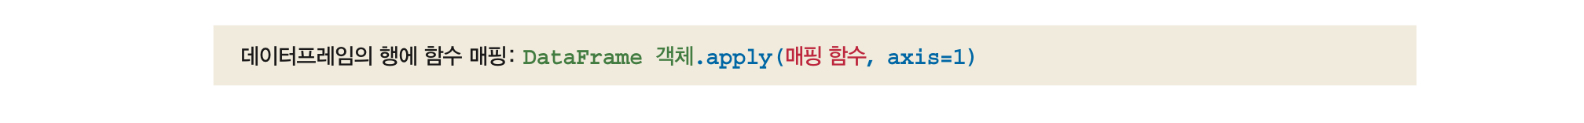

In [16]:
# 사용자 함수 정의
def add_two_obj(a, b):    # 두 객체의 합
    return a + b

In [17]:
# 데이터프레임의 2개 열을 선택하여 적용
# x=df, a=df['age'], b=df['ten']
# apply함수, 옵션: lambda x: add_two_obj, axis=1

df['add'] = df.apply(lambda x: add_two_obj(x['age'], 10), axis=1)
df['add'].head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: add, dtype: float64

### 1-3. 데이터 프레임 객체에 함수 매핑
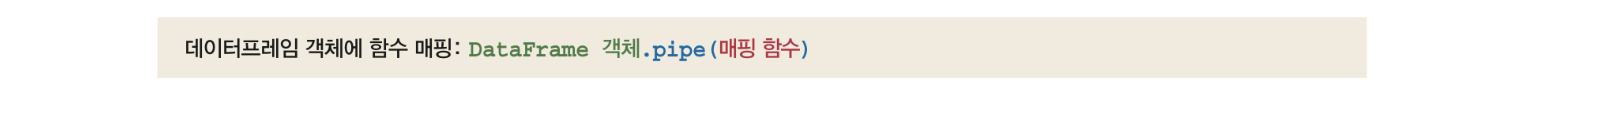
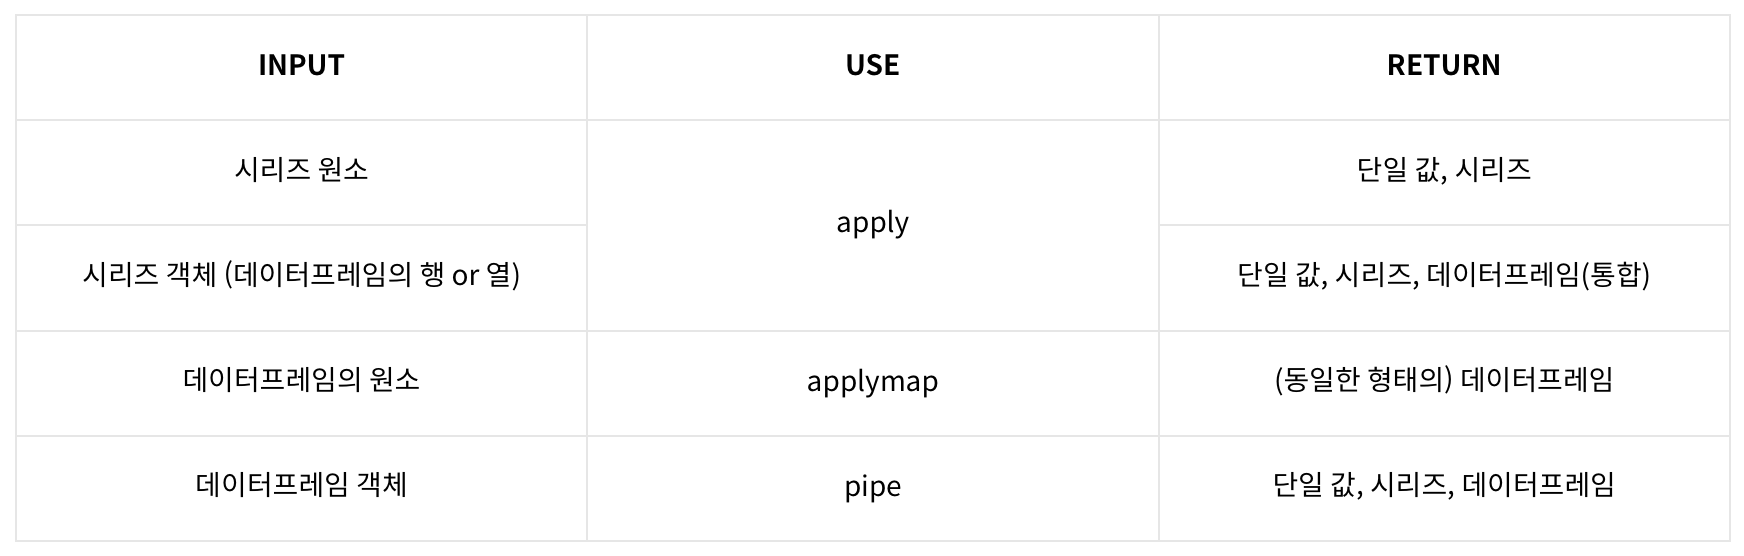

In [18]:
# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):
    return x.isnull()    

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x): 
    return missing_count(x).sum()

In [19]:
# 데이터프레임에 pipe() 메소드로 함수 매핑
result_df = df.pipe(missing_value)
result_df

,age,fare,add
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,True,False,True
889,False,False,False


In [20]:
result_series = df.pipe(missing_count)   
result_series

age     177
fare      0
add     177
dtype: int64

In [21]:
result_value = df.pipe(totoal_number_missing)   
result_value

354

-----------

## 2. 열 재구성

### !! 2-1. 열 순서 변경
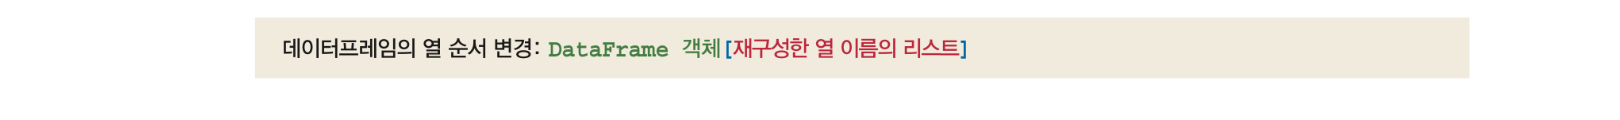

In [22]:
# titanic 데이터셋의 부분을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [23]:
# 열 이름의 리스트 만들기
columns = list(df.columns.values)   #기존 열 이름

# 열 이름을 알파벳 순으로 정렬하기

columns_sorted = sorted(columns)
columns_sorted

['age', 'pclass', 'sex', 'survived']

In [24]:
# 열 이름을 기존 순서의 정반대 역순으로 정렬하기

columns_reversed = sorted(columns_sorted, reverse=True)
columns_reversed

['survived', 'sex', 'pclass', 'age']

In [25]:
# 새로운 df 만들기
df_reversed = df[columns_reversed]
df_reversed.head()

,survived,sex,pclass,age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0


In [26]:
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [27]:
# 열 이름을 사용자가 정의한 임의의 순서로 재배치하기
columns_customed = ['pclass', 'sex', 'age', 'survived']  
df_a = df[columns_customed]
df_a.head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


### 2-2. 열 분리
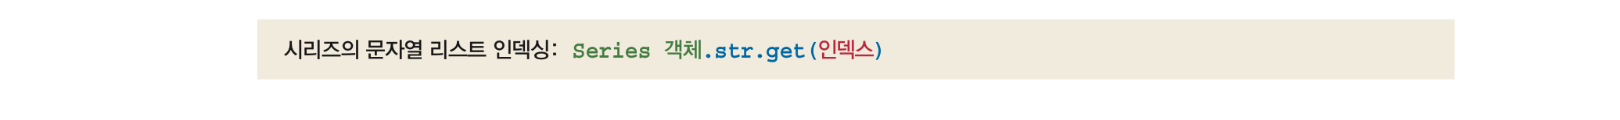

In [28]:
import pandas as pd

# 데이터셋 가져오기
df = pd.read_excel('./주가데이터.xlsx')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [29]:
# 연, 월, 일 데이터 분리하기
df['연월일'] = df['연월일'].astype('str')   # 문자열 메소드 사용을 자료형 변경
dates = df['연월일'].str.split('-')        # 문자열을 split() 메서드로 분리
print(dates, type(dates))

0     [2018, 07, 02]
1     [2018, 06, 29]
2     [2018, 06, 28]
3     [2018, 06, 27]
4     [2018, 06, 26]
5     [2018, 06, 25]
6     [2018, 06, 22]
7     [2018, 06, 21]
8     [2018, 06, 20]
9     [2018, 06, 19]
10    [2018, 06, 18]
11    [2018, 06, 15]
12    [2018, 06, 14]
13    [2018, 06, 12]
14    [2018, 06, 11]
15    [2018, 06, 08]
16    [2018, 06, 07]
17    [2018, 06, 05]
18    [2018, 06, 04]
19    [2018, 06, 01]
Name: 연월일, dtype: object <class 'pandas.core.series.Series'>


In [30]:
# 분리된 정보를 각각 새로운 열에 담아서 df에 추가하기

df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


--------

## ! 3. 필터링

### 3-1. 불린 인덱싱
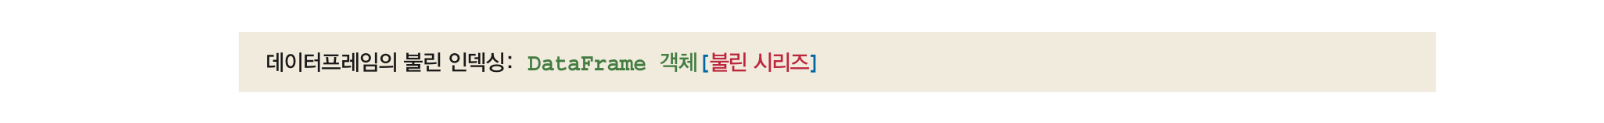

In [31]:
# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

In [32]:
# 나이가 10대(10~19세)인 승객만 따로 선택
mask1 = (titanic.age >= 10) & (titanic.age < 20)

df_teenage = titanic.loc[mask1, :]
df_teenage.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [33]:
mask1

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [34]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택

mask2 = (titanic.age<10) & (titanic.sex=='female')
df_female_under10 = titanic.loc[mask2,:]
df_female_under10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [35]:
# 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
# '또는'의 연산기호 | (파이프)

mask3 = (titanic.age < 10) | (titanic.age >= 60)
df_under10_morethan60 = titanic.loc[mask3, ['age', 'sex', 'alone']]
df_under10_morethan60.head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


### 3-2. isin() 메소드 활용
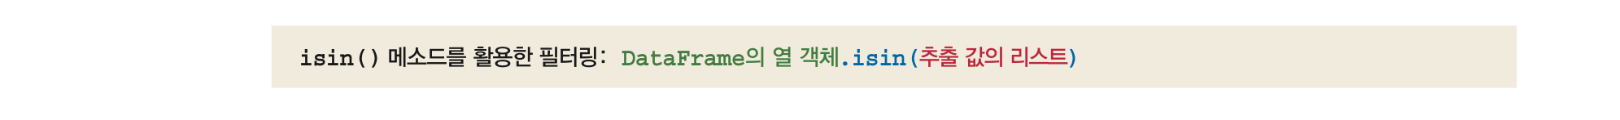

In [36]:
# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 10)  

In [37]:
# 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5

In [38]:
mask5

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: sibsp, Length: 891, dtype: bool

In [39]:
df_boolean = titanic[mask3 | mask4 | mask5]
df_boolean.head()

,survived,pclass,sex,age,sibsp,...,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,...,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,...,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,...,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,...,True,C,Southampton,no,False
50,0,3,male,7.0,4,...,False,NaN,Southampton,no,False


In [40]:
# isin() 메서드 활용하여 동일한 조건으로 추출

isin_filter = titanic['sibsp'].isin([3,4,5])
df_isin = titanic.loc[isin_filter, :]
df_isin.head()

,survived,pclass,sex,age,sibsp,...,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,...,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,...,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,...,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,...,True,C,Southampton,no,False
50,0,3,male,7.0,4,...,False,NaN,Southampton,no,False


------

## !! 4. 데이터프레임 합치기

### 4-1. 데이터 프레임 연결
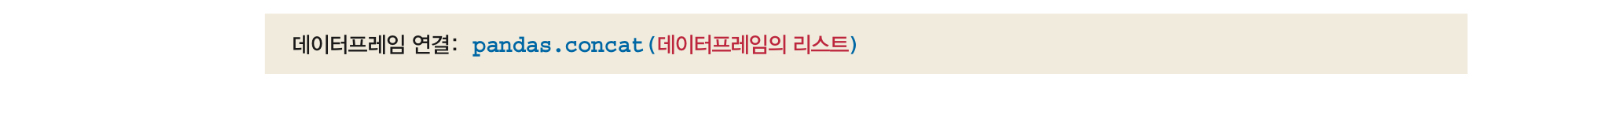
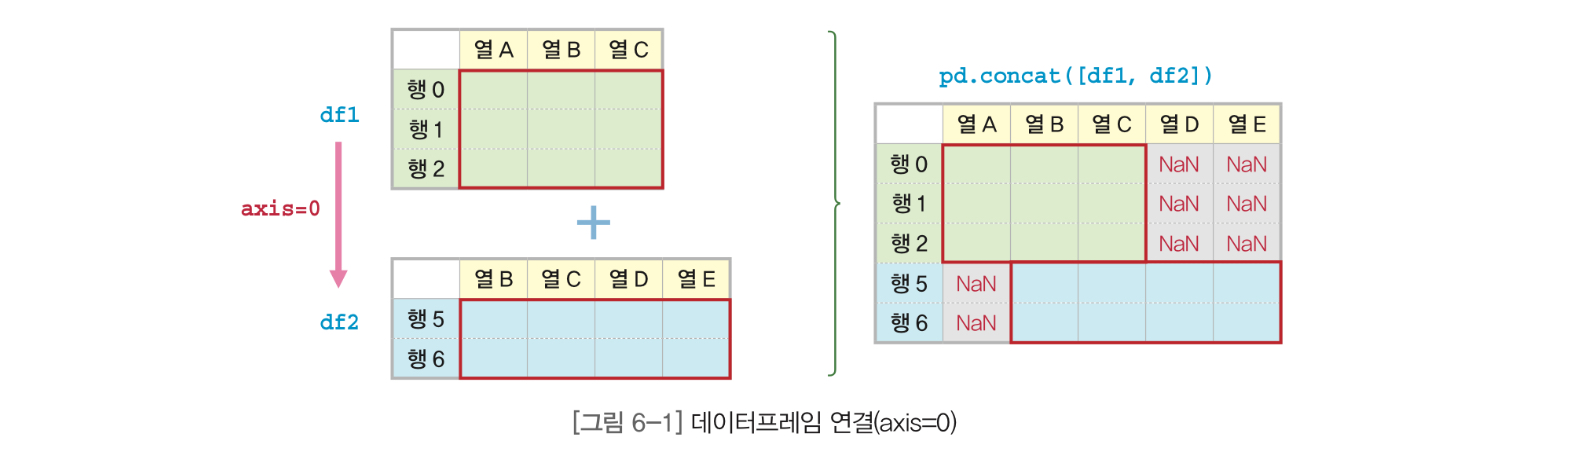
* 그림은 join='outer' 옵션 적용 예시 / join='inner' 옵션 적용 시 교집합(B,C) 만 연결

In [41]:
# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [42]:
df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


In [43]:
df2

,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [44]:
# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기 

result1 = pd.concat([df1, df2])
result1

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [45]:
# ignore_index=True 옵션 설정하기 

result2 = pd.concat([df1, df2], ignore_index=True)
result2

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


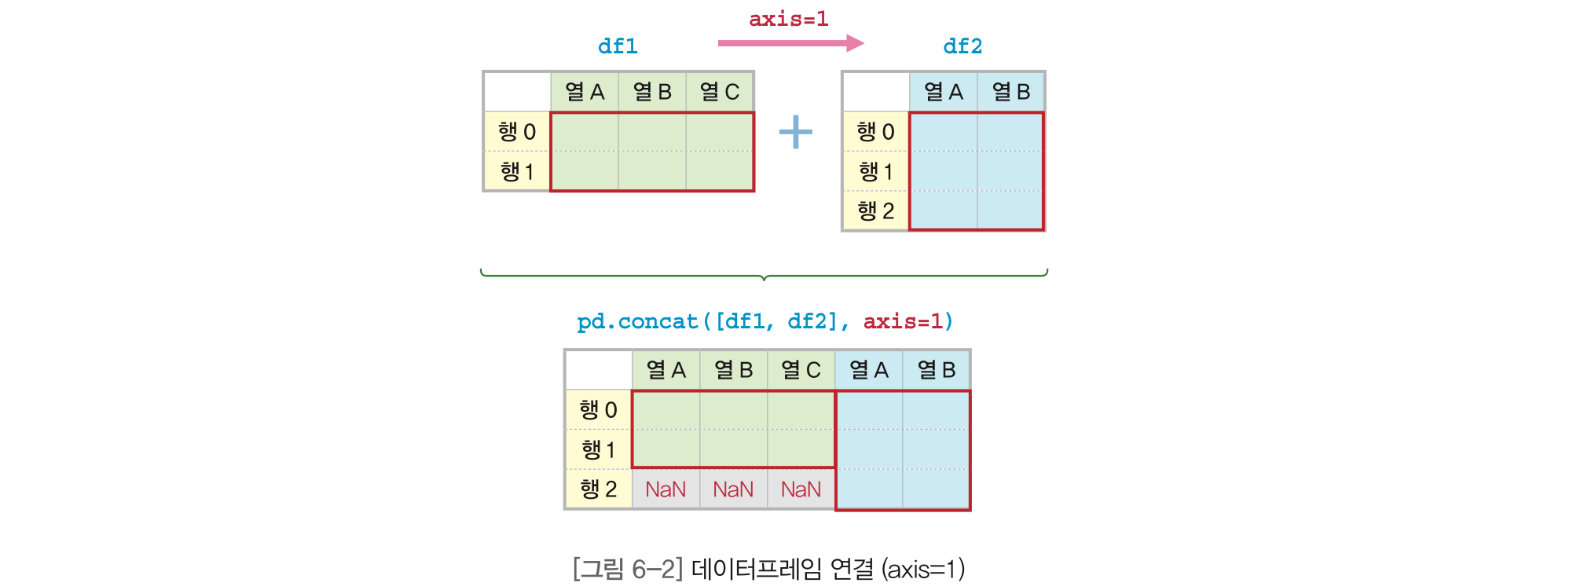

In [46]:
# 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기 

result3 = pd.concat([df1, df2], axis=1)
result3

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [47]:
# join='inner' 옵션 적용하기(교집합)

result3_in = pd.concat([df1, df2], axis=1, join='inner')
result3_in

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


#### 시리즈와 데이터 프레임 연결

In [48]:
# 시리즈 만들기
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

In [49]:
# df1과 sr1을 좌우 열 방향으로 연결하기

result4 = pd.concat([df1, sr1], axis=1)
result4

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


In [50]:
# df2과 sr2을 좌우 열 방향으로 연결하기
# sort 옵션 = True

result5 = pd.concat([df2, sr2], axis=1, sort=True)
result5

,a,b,c,d,f
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,f0
4,a4,b4,c4,d4,f1
5,a5,b5,c5,d5,f2


In [51]:
# sr1과 sr3을 좌우 열 방향으로 연결하기

result6 = pd.concat([sr1, sr3], axis=1)
result6

,e,g
0,e0,g0
1,e1,g1
2,e2,g2
3,e3,g3


In [52]:
# s1과 s3을 위 아래 행 방향으로 연결하기 

result7 = pd.concat([sr1, sr3])
result7

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object

### 4-2. 데이터 프레임 병합
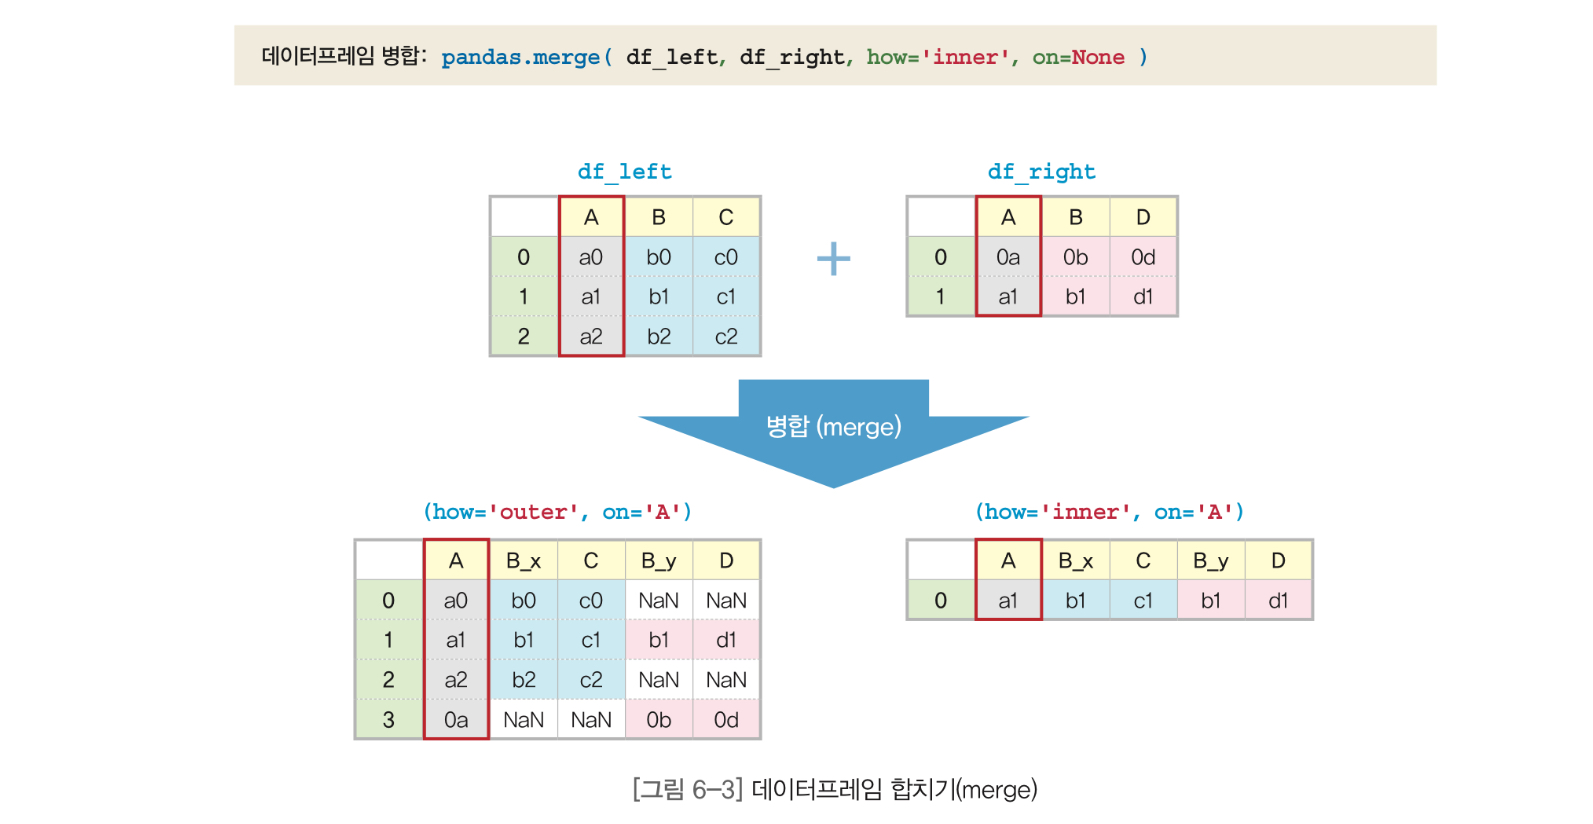

In [53]:
# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

In [54]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx')
df2 = pd.read_excel('./stock valuation.xlsx')

In [55]:
df1.head()

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200


In [56]:
df2.head()

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627


In [57]:
# 데이터프레임 합치기 - 교집합
# 옵션 X

merge_inner = pd.merge(df1, df2)
merge_inner

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [58]:
# 데이터프레임 합치기 - 합집합
# 옵션: how='outer', on='id'

merge_outer = pd.merge(df1, df2, how='outer', on='id')
merge_outer.head()

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN


In [59]:
# 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
# 옵션: how='left', left_on='stock_name', right_on='name'

merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
merge_left

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [60]:
# 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
# 옵션: how='right', left_on='stock_name', right_on='name'

merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
merge_right

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
2,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627
3,185750.0,종근당,40293.666667,100500.0,185750,종근당,3990.333333,40684,25.185866,2.470259
4,204210.0,모두투어리츠,3093.333333,3475.0,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
5,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
6,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
7,NaN,NaN,NaN,NaN,161390,한국타이어,5648.500000,51341,7.453306,0.820007
8,NaN,NaN,NaN,NaN,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
9,NaN,NaN,NaN,NaN,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [62]:
df1

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


In [64]:
df1['price'] < 50000

0    False
1    False
2     True
3    False
4     True
5    False
6    False
7    False
8    False
9     True
Name: price, dtype: bool

In [65]:
# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1['price'] < 50000]
price

,id,stock_name,value,price
2,138250,엔에스쇼핑,14558.666667,13200
4,142280,녹십자엠에스,468.833333,10200
9,204210,모두투어리츠,3093.333333,3475


In [66]:
# price와 df2 merge
value = pd.merge(price, df2)
value

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


### 4-3. 데이터 프레임 결합
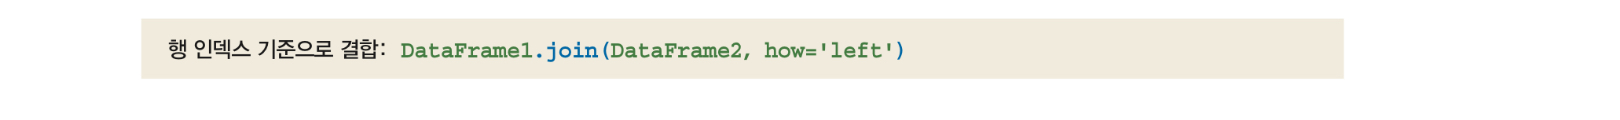
* merge 기반으로 만들어진 함수
* 행 인덱스를 기준으로 결합

In [67]:
# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

In [68]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx', index_col='id')
df2 = pd.read_excel('./stock valuation.xlsx', index_col='id')

-------

In [75]:
b="1,2"


a = b.split(",")
a

['1', '2']

In [76]:
("-").join(a)


'1-2'

-----

In [79]:
merge_outer

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [80]:
# 데이터프레임 결합(join)

df3 = df1.join(df2)
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [84]:
# 데이터프레임 결합(join) - 교집합
# 옵션: how='inner'

df4 = df1.join(df2, how='inner')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


----------